# CHAPTER 6 Unsupervised Machine Learning Algorithms
@copyright Imran Ahmad

# 1 -K-means Algorithm
## STEP 1- Import packages
First, let us import the packages that we will need to code for K-means algorithm.

In [1]:
from sklearn import cluster
import pandas as pd
import numpy as np

## STEP 2- Data
To use K-means clustering, first let us create 20 data-points in two dimensional problem space that we will be using for K-means clustering.

In [2]:

dataset = pd.DataFrame({
    'x': [11, 11, 20, 12, 16, 33, 24, 14, 45, 52, 51, 52, 55, 53, 55, 61, 62, 70, 72, 10],
    'y': [39, 36, 30, 52, 53, 46, 55, 59, 12, 15, 16, 18, 11, 23, 14, 8, 18, 7, 24, 70]
})

## STEP 3-  Training the Model
We will be using the sklearn package implementation of K-means clustering. Let us choose number of clusters, k =2

In [3]:
myKmeans = cluster.KMeans(n_clusters=2)
myKmeans.fit(dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## STEP 4- Printing labels and cluster centers
Let us now look into the labels and the cluster centers

In [4]:
labels = myKmeans.labels_
centers = myKmeans.cluster_centers_

In [5]:
print(labels)

[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1]


In [6]:
print(centers)

[[57.09090909 15.09090909]
 [16.77777778 48.88888889]]


## STEP 5-  Plot
Using matplotlib let us draw the datapoints and the cluster centers

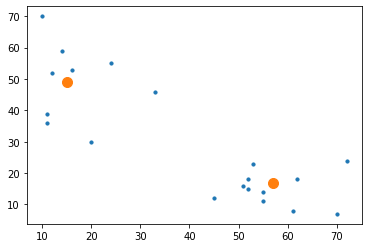

In [7]:
import matplotlib.pyplot as plt
plt.scatter(dataset['x'],dataset['y'], s=10)
plt.scatter(centers[0],centers[1],s=100)
plt.show()

# 2 Hierarchical Algorithm

## STEP 1: Import Packages

In [8]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np

## STEP 2: Create Dataframe

In [9]:
dataset = pd.DataFrame({
    'x': [11, 11, 20, 12, 16, 33, 24, 14, 45, 52, 51, 52, 55, 53, 55, 61, 62, 70, 72, 10],
    'y': [39, 36, 30, 52, 53, 46, 55, 59, 12, 15, 16, 18, 11, 23, 14, 8, 18, 7, 24, 70]
})

## STEP 3: Create Clusters

In [10]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(dataset)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

## STEP 4: Print Clusters

In [11]:
print(cluster.labels_)  

[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0]


# 3 PCA

In [12]:
from sklearn.decomposition import PCA
iris = pd.read_csv('iris.csv')
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
X = iris.drop('Species', axis=1)
pca = PCA(n_components=4)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
pca_df=(pd.DataFrame(pca.components_,columns=X.columns))
pca_df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


In [15]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


In [16]:
X['PC1'] = X['Sepal.Length']* pca_df['Sepal.Length'][0] + X['Sepal.Width']* pca_df['Sepal.Width'][0]+ X['Petal.Length']* pca_df['Petal.Length'][0]+X['Petal.Width']* pca_df['Petal.Width'][0]
X['PC2'] = X['Sepal.Length']* pca_df['Sepal.Length'][1] + X['Sepal.Width']* pca_df['Sepal.Width'][1]+ X['Petal.Length']* pca_df['Petal.Length'][1]+X['Petal.Width']* pca_df['Petal.Width'][1]
X['PC3'] = X['Sepal.Length']* pca_df['Sepal.Length'][2] + X['Sepal.Width']* pca_df['Sepal.Width'][2]+ X['Petal.Length']* pca_df['Petal.Length'][2]+X['Petal.Width']* pca_df['Petal.Width'][2]
X['PC4'] = X['Sepal.Length']* pca_df['Sepal.Length'][3] + X['Sepal.Width']* pca_df['Sepal.Width'][3]+ X['Petal.Length']* pca_df['Petal.Length'][3]+X['Petal.Width']* pca_df['Petal.Width'][3]
X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,2.818240,5.646350,-0.659768,0.031089
1,4.9,3.0,1.4,0.2,2.788223,5.149951,-0.842317,-0.065675
2,4.7,3.2,1.3,0.2,2.613375,5.182003,-0.613952,0.013383
3,4.6,3.1,1.5,0.2,2.757022,5.008654,-0.600293,0.108928
4,5.0,3.6,1.4,0.2,2.773649,5.653707,-0.541773,0.094610
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,7.446475,5.514485,-0.454028,-0.392844
146,6.3,2.5,5.0,1.9,7.029532,4.951636,-0.753751,-0.221016
147,6.5,3.0,5.2,2.0,7.266711,5.405811,-0.501371,-0.103650
148,6.2,3.4,5.4,2.3,7.403307,5.443581,0.091399,-0.011244


# 4 FPGrowth

Association rules can be generated by FP growth algorithm as follows. 

If pyfpgrowth is not installed then start with installing it first.

In [17]:
!pip install pyfpgrowth

     |████████████████████████████████| 1.6 MB 2.0 MB/s eta 0:00:01
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5479 sha256=58c024346b549aee0838f71b566801781597e69ded33b01a9868bd99c2fcc5e2
  Stored in directory: /home/iahmad/.cache/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


In [18]:
import pandas as pd
import numpy as np
import pyfpgrowth as fp

## STEP 2: Create Transaction Dataset
Create Transaction Dataset

In [19]:
dict1 = {
    'id':[0,1,2,3],
    'items':[["wickets","pads"],
    ["bat","wickets","pads","helmet"],
    ["helmet","pad"],
    ["bat","pads","helmet"]]
    
}
transactionSet = pd.DataFrame(dict1)
transactionSet

,id,items
0,0,"[wickets, pads]"
1,1,"[bat, wickets, pads, helmet]"
2,2,"[helmet, pad]"
3,3,"[bat, pads, helmet]"


## STEP 4: Generating the frequent patterns and the rules
Patterns are generated based on the parameters passed in the find_frequent_patterns() , where “transactions” are the list of items bought at each transaction(refer to the ITEMS column of the table) and 10 is the minimum threshold set for support count.

In [20]:
patterns = fp.find_frequent_patterns(transactionSet['items'],1)

In [21]:
patterns

{('pad',): 1,
 ('helmet', 'pad'): 1,
 ('wickets',): 2,
 ('pads', 'wickets'): 2,
 ('bat', 'wickets'): 1,
 ('helmet', 'wickets'): 1,
 ('bat', 'pads', 'wickets'): 1,
 ('helmet', 'pads', 'wickets'): 1,
 ('bat', 'helmet', 'wickets'): 1,
 ('bat', 'helmet', 'pads', 'wickets'): 1,
 ('bat',): 2,
 ('bat', 'helmet'): 2,
 ('bat', 'pads'): 2,
 ('bat', 'helmet', 'pads'): 2,
 ('pads',): 3,
 ('helmet',): 3,
 ('helmet', 'pads'): 2}

Patterns are generated based on the parameters passed in the find_frequent_patterns() , where “transactions” are the list of items bought at each transaction(refer to the ITEMS column of the table) and 10 is the minimum threshold set for support count.

rules = fp.generate_association_rules(patterns,0.8)

rules = fp.generate_association_rules(patterns,0.3)
rules

In [22]:
rules = fp.generate_association_rules(patterns,0.3)
rules

{('helmet',): (('pads',), 0.6666666666666666),
 ('pad',): (('helmet',), 1.0),
 ('pads',): (('helmet',), 0.6666666666666666),
 ('wickets',): (('bat', 'helmet', 'pads'), 0.5),
 ('bat',): (('helmet', 'pads'), 1.0),
 ('bat', 'pads'): (('helmet',), 1.0),
 ('bat', 'wickets'): (('helmet', 'pads'), 1.0),
 ('pads', 'wickets'): (('bat', 'helmet'), 0.5),
 ('helmet', 'pads'): (('bat',), 1.0),
 ('helmet', 'wickets'): (('bat', 'pads'), 1.0),
 ('bat', 'helmet'): (('pads',), 1.0),
 ('bat', 'helmet', 'pads'): (('wickets',), 0.5),
 ('bat', 'helmet', 'wickets'): (('pads',), 1.0),
 ('bat', 'pads', 'wickets'): (('helmet',), 1.0),
 ('helmet', 'pads', 'wickets'): (('bat',), 1.0)}